<a href="https://colab.research.google.com/github/alfie-agustin/Analisis-predictivo/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as os
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/2022/Analisis predictivo/pricepred/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

***MARCA AUTO***

In [5]:
def marca(autos = []):
  marcas = []
  i=0
  while i < len(autos):
    #print(i)
    auto = autos[i]
    # print(auto) --> hasta aca funciona
    word_list = auto.split()
    #print(word_list) --> hasta aca tambien
    marca = word_list[0]
    #print(marca) --> hasta aca tambien
    marcas += marca
    # print(marcas) --> aca se rompe REVISAR!!
    i+=1
  return marcas

In [6]:
lista_autos = df.CarName
lista = list(lista_autos)
marca(lista)

['a',
 'l',
 'f',
 'a',
 '-',
 'r',
 'o',
 'm',
 'e',
 'r',
 'o',
 'a',
 'l',
 'f',
 'a',
 '-',
 'r',
 'o',
 'm',
 'e',
 'r',
 'o',
 'a',
 'l',
 'f',
 'a',
 '-',
 'r',
 'o',
 'm',
 'e',
 'r',
 'o',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'a',
 'u',
 'd',
 'i',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'b',
 'm',
 'w',
 'c',
 'h',
 'e',
 'v',
 'r',
 'o',
 'l',
 'e',
 't',
 'c',
 'h',
 'e',
 'v',
 'r',
 'o',
 'l',
 'e',
 't',
 'c',
 'h',
 'e',
 'v',
 'r',
 'o',
 'l',
 'e',
 't',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'd',
 'o',
 'd',
 'g',
 'e',
 'h',
 'o',
 'n',
 'd',
 'a',
 'h',
 'o',
 'n',
 'd',
 'a'

***DISTRIBUCION VARIABLES***

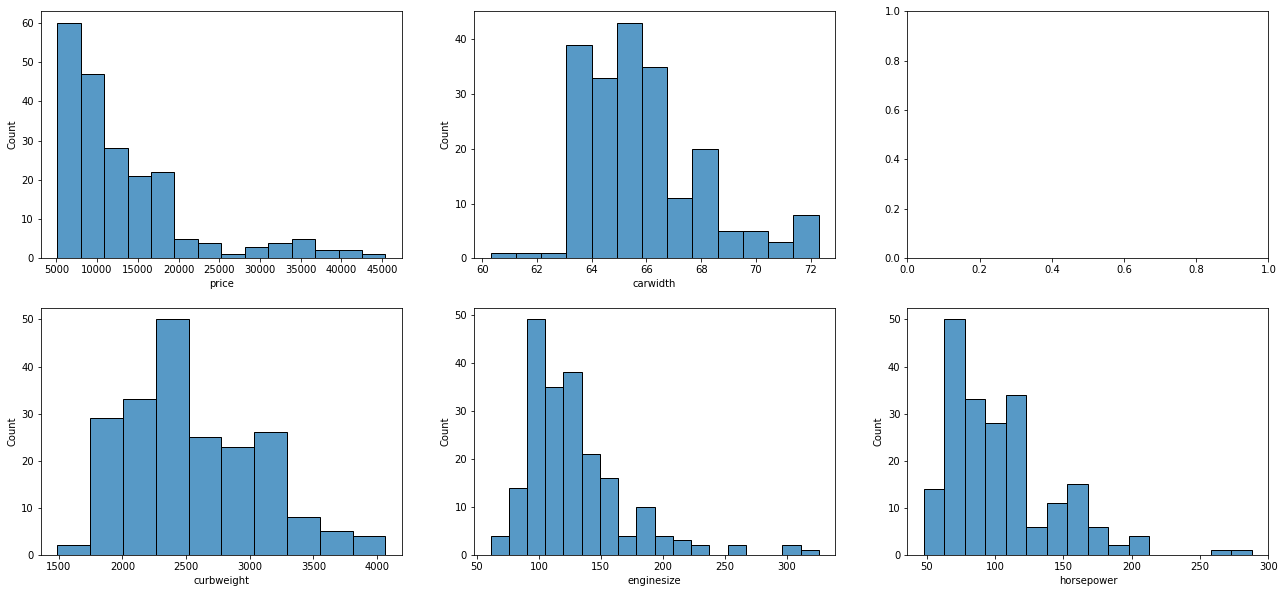

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.histplot(data=df, x="price", ax=axs[0,0],multiple="stack")
sns.histplot(data=df, x="carwidth",  ax=axs[0,1],multiple="stack")
sns.histplot(data=df, x="curbweight",  ax=axs[1,0],multiple="stack")
sns.histplot(data=df, x="enginesize", ax=axs[1,1],multiple="stack")
sns.histplot(data=df, x="horsepower", ax=axs[1,2],multiple="stack")
plt.show()

***CORRELACIONES***


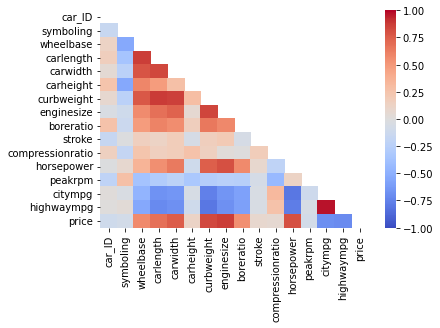

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = False
            , cmap = 'coolwarm', mask = mask)

#se puede ver una posible relacioin entre el precioi con el ancho del auto, el peso, el tamaño de motor y los caballos de fuerza

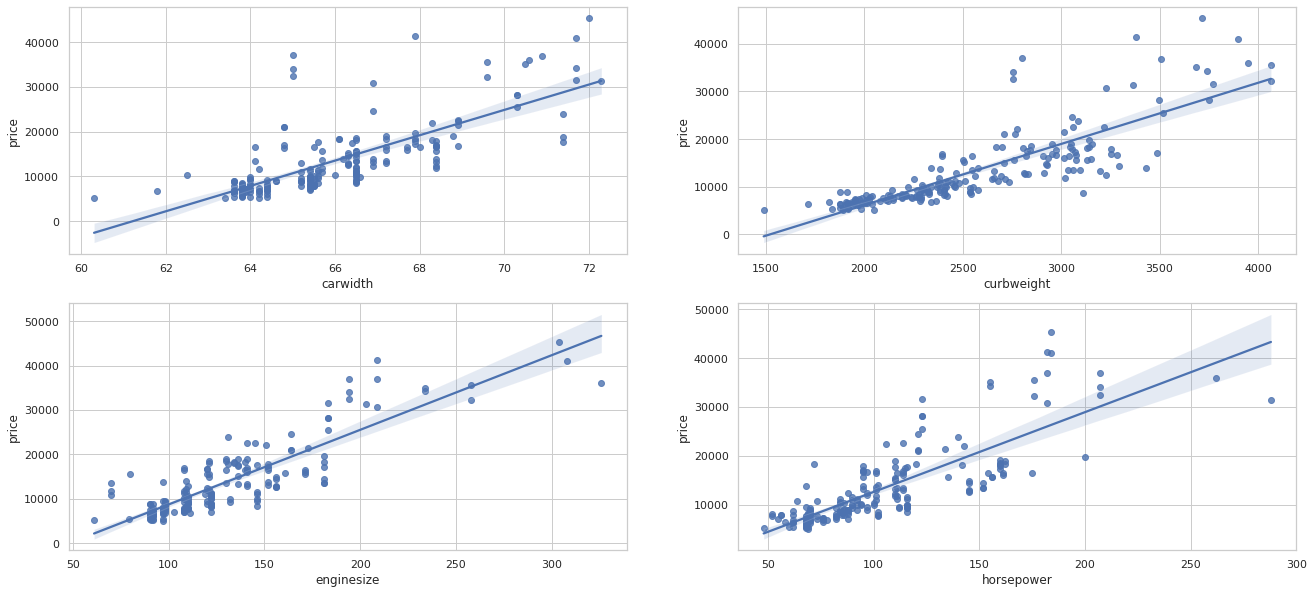

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(22, 10))

# Ponerle las correlaciones como titulos 

sns.regplot(x = df.carwidth, y = df.price, ax=axs[0,0], )
sns.regplot(x = df.curbweight, y = df.price, ax=axs[0,1])
sns.regplot(x = df.enginesize, y = df.price, ax = axs[1,0])
sns.regplot(x = df.horsepower, y = df.price, ax = axs[1,1])
plt.show()

***SCATTER PLOTS PARA ENTENDER MEJOR EL TIPO DE CORR***

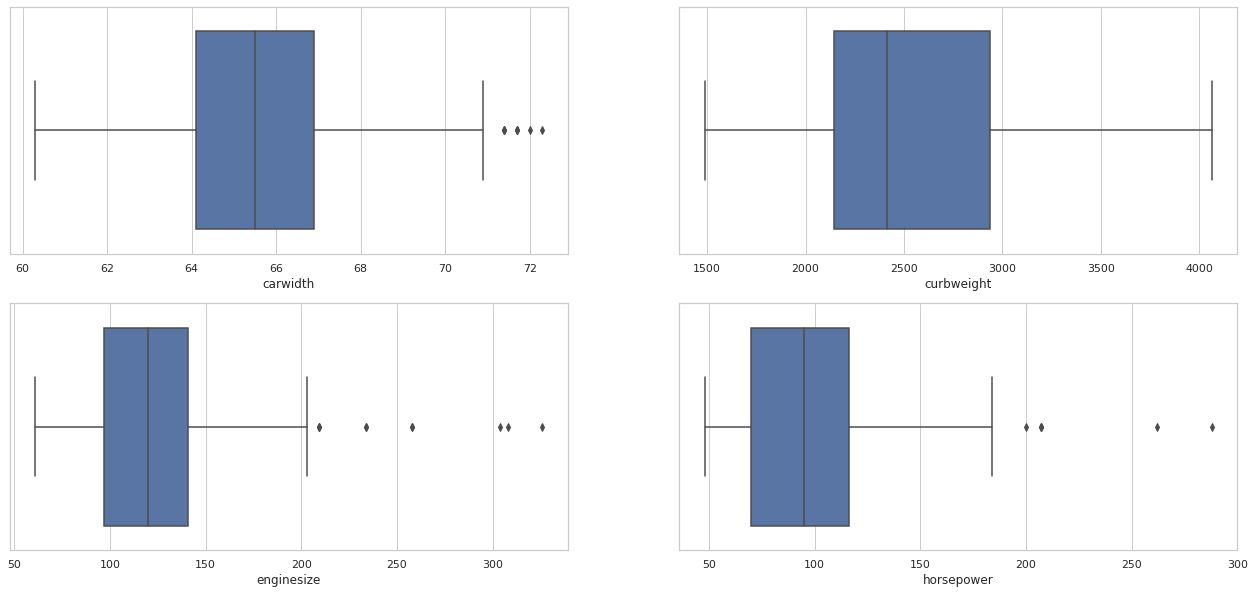

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(22, 10))




sns.boxplot(x=df.carwidth, ax=axs[0,0])
sns.boxplot(x=df.curbweight, ax=axs[0,1])
sns.boxplot(x=df.enginesize, ax = axs[1,0])
sns.boxplot(x=df.horsepower, ax = axs[1,1])
plt.show()


En todas las correlaciones se pueden ver correlaciones lineales, esto podria dar indicios de las variables que van a influir en la prediccioin


CATEGORICAS VS PRECIO

<BarContainer object of 205 artists>

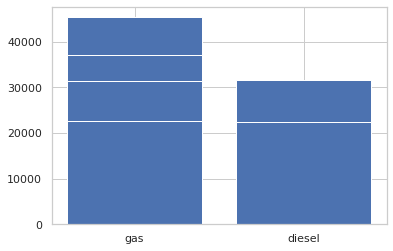

In [ ]:
plt.bar(df.fueltype, df.price, )

#los autos que usan diesel valen un 25% menos

<BarContainer object of 205 artists>

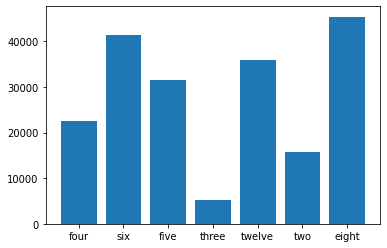

In [ ]:
plt.bar(df.cylindernumber, df.price)
# no se ve una relacion constante

***TRAIN Y TEST***


In [8]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['price']).copy()
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(164, 25)
(164,)
(41, 25)
(41,)


(None, None)

**falta el modelo de regresion**